In [145]:
import requests
import pandas as pd
import json
import matplotlib as plt
import seaborn as sns
from pandas.io.json import json_normalize
url1 = "http://ec2-54-88-151-77.compute-1.amazonaws.com:3001/v1/admissions?limit=50000&offset=0"
conn1 = requests.get(url1).json()
file1 = conn1['admissions']
admissions =  pd.DataFrame.from_dict(file1, orient='columns')

In [9]:
url = "http://ec2-54-88-151-77.compute-1.amazonaws.com:3001/v1/admissions?limit=50000&offset=0"

url1 = "http://ec2-54-88-151-77.compute-1.amazonaws.com:3003/v1/eligibilities?limit=50000&offset=0"

url2 = "http://ec2-54-88-151-77.compute-1.amazonaws.com:3003/v1/conditions?limit=50000&offset=0"

In [11]:
#conn = requests.get(url).json()
#conn1 = requests.get(url1).json()
#conn2 = requests.get(url2).json()

In [ ]:
file = conn1['admissions']
file1 = conn1['eligibility']
file2 = conn1['conditions']
admissions =  pd.DataFrame.from_dict(file, orient='columns')
eligibilities =  pd.DataFrame.from_dict(file1, orient='columns')
conditions =  pd.DataFrame.from_dict(file2, orient='columns')

In [12]:
admissions = pd.read_table(r'C:\Users\venkataavinashy\Desktop\Vlife\MIMIC-III_readmission-master\MIMIC-III_readmission-master\notebooks\Tables\admissions.csv', delimiter = ',')

In [3]:
admissions.head(3)

,admission_location,admission_type,admittime,deathtime,diagnosis,discharge_location,dischtime,edouttime,edregtime,ethnicity,hadm_id,has_chartevents_data,hospital_expire_flag,insurance,language,marital_status,religion,row_id,subject_id
0,EMERGENCY ROOM ADMIT,EMERGENCY,2196-04-09T12:26:00.000Z,None,BENZODIAZEPINE OVERDOSE,DISC-TRAN CANCER/CHLDRN H,2196-04-10T15:54:00.000Z,2196-04-09T13:24:00.000Z,2196-04-09T10:06:00.000Z,WHITE,165315,1,0,Private,None,MARRIED,UNOBTAINABLE,21,22
1,PHYS REFERRAL/NORMAL DELI,ELECTIVE,2153-09-03T07:15:00.000Z,None,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,HOME HEALTH CARE,2153-09-08T19:10:00.000Z,None,None,WHITE,152223,1,0,Medicare,None,MARRIED,CATHOLIC,22,23
2,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,2157-10-18T19:34:00.000Z,None,BRAIN MASS,HOME HEALTH CARE,2157-10-25T14:00:00.000Z,None,None,WHITE,124321,1,0,Medicare,ENGL,MARRIED,CATHOLIC,23,23


In [4]:
admissions.discharge_location.value_counts()

HOME                         16575
HOME HEALTH CARE             11669
SNF                           6210
REHAB/DISTINCT PART HOSP      5617
DEAD/EXPIRED                  4977
LONG TERM CARE HOSPITAL       1593
SHORT TERM HOSPITAL           1452
DISC-TRAN CANCER/CHLDRN H      666
DISCH-TRAN TO PSYCH HOSP       346
HOSPICE-HOME                   310
LEFT AGAINST MEDICAL ADVI      306
HOSPICE-MEDICAL FACILITY       122
HOME WITH HOME IV PROVIDR       67
OTHER FACILITY                  47
ICF                             31
DISC-TRAN TO FEDERAL HC         11
SNF-MEDICAID ONLY CERTIF         1
Name: discharge_location, dtype: int64

In [5]:
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['los'] = admissions['dischtime'] - admissions['admittime']

In [192]:
onedayadmits = admissions[admissions.los.astype('timedelta64[D]')<1 & admissions.los.notnull()]
onedayadmits['los'] = onedayadmits['los'].apply(lambda x: x.total_seconds())
onedayadmits['los'] = onedayadmits['los']/3600
onedayadmits = onedayadmits[onedayadmits.los > 1]

#Dropping columns
onedayadmits = onedayadmits.drop(['row_id','edregtime','edouttime','dischtime','deathtime'],axis=1)

C:\Users\venkataavinashy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\venkataavinashy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [193]:
onedayadmits.head(1)

,admission_location,admission_type,admittime,diagnosis,discharge_location,ethnicity,hadm_id,has_chartevents_data,hospital_expire_flag,insurance,language,marital_status,religion,subject_id,los
65,EMERGENCY ROOM ADMIT,EMERGENCY,2169-01-07 01:50:00,? PULMONARY EMBOLUS WITH DESATURATION,LONG TERM CARE HOSPITAL,WHITE,195961,1,0,Medicare,None,DIVORCED,JEWISH,63,12.5


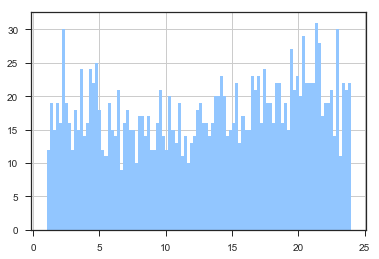

In [194]:
%matplotlib inline
onedayadmits['los'].hist(bins = 100)

In [195]:
onedayadmits.hospital_expire_flag.value_counts()

0    1071
1     724
Name: hospital_expire_flag, dtype: int64

In [196]:
diedinhosp  = onedayadmits[onedayadmits.hospital_expire_flag == 1 ]

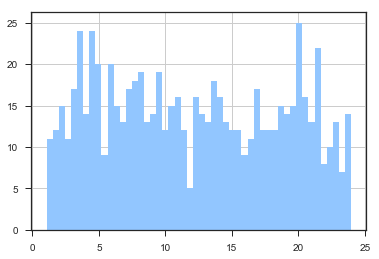

In [197]:
diedinhosp.los.hist(bins=50)

In [198]:
onedayadmits.diagnosis = onedayadmits.diagnosis.fillna('')

In [120]:
onedayadmits.religion.value_counts()

CATHOLIC                  475
UNOBTAINABLE              416
NOT SPECIFIED             404
PROTESTANT QUAKER         180
JEWISH                    140
OTHER                     120
CHRISTIAN SCIENTIST        16
MUSLIM                      9
BUDDHIST                    9
GREEK ORTHODOX              8
JEHOVAH'S WITNESS           7
HINDU                       4
ROMANIAN EAST. ORTH         3
UNITARIAN-UNIVERSALIST      3
BAPTIST                     1
Name: religion, dtype: int64

In [200]:
onedayadmits.religion = onedayadmits.religion.fillna('OTHER')

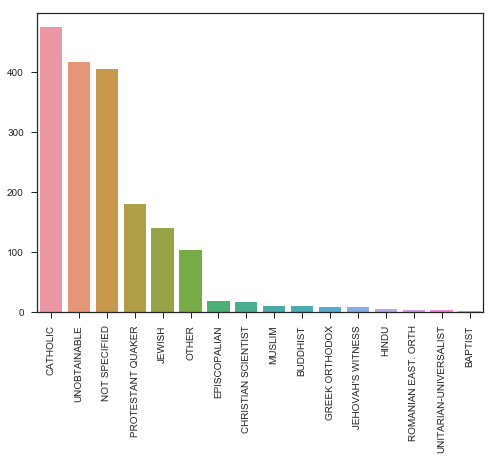

In [202]:
sns.set(style="ticks", palette="pastel")


g = sns.barplot(onedayadmits.religion.value_counts().index, onedayadmits['religion'].value_counts().values)
g.set_xticklabels(labels = onedayadmits.religion.value_counts().index.tolist(), rotation=90)

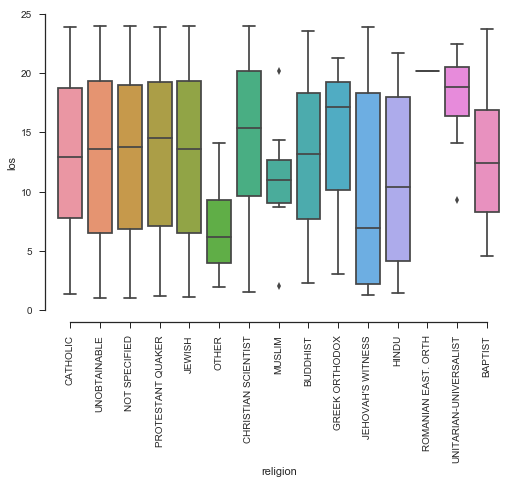

In [167]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")
sns.boxplot
g = sns.boxplot(x="religion", y="los", data=onedayadmits)
sns.despine(offset=10, trim=True)
g.set_xticklabels(labels = onedayadmits.religion.value_counts().index.tolist(), rotation=90)

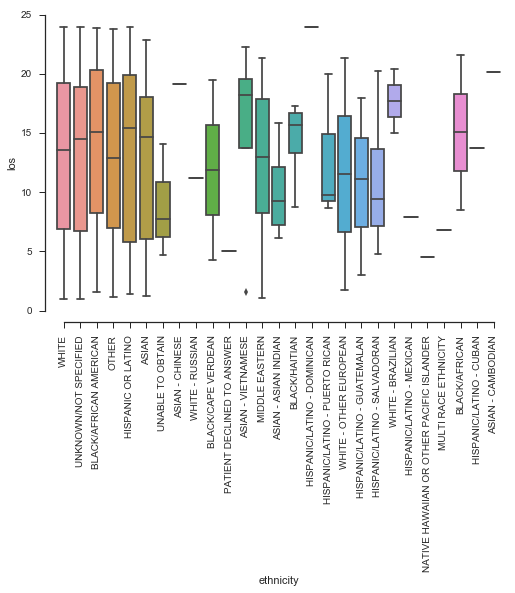

In [169]:
g = sns.boxplot(x="ethnicity", y="los", data=onedayadmits)
sns.despine(offset=10, trim=True)
g.set_xticklabels(labels = onedayadmits.ethnicity.value_counts().index.tolist(), rotation=90)

In [205]:
onedayadmits.language = onedayadmits.language.fillna('NONE')

In [174]:
onedayadmits.language.value_counts()

NONE    870
ENGL    798
SPAN     31
RUSS     24
PTUN     24
CANT     14
PORT     10
MAND      4
CAPE      4
VIET      4
KORE      3
HAIT      2
FREN      2
ITAL      1
PERS      1
AMER      1
*HUN      1
CAMB      1
Name: language, dtype: int64

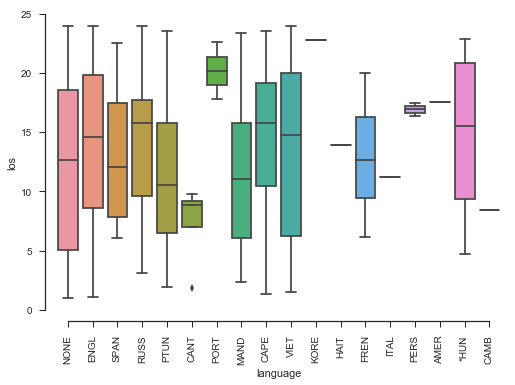

In [175]:
g = sns.boxplot(x="language", y="los", data=onedayadmits)
sns.despine(offset=10, trim=True)
g.set_xticklabels(labels = onedayadmits.language.value_counts().index.tolist(), rotation=90)

In [207]:
onedayadmits.marital_status = onedayadmits.marital_status.fillna('NONE')

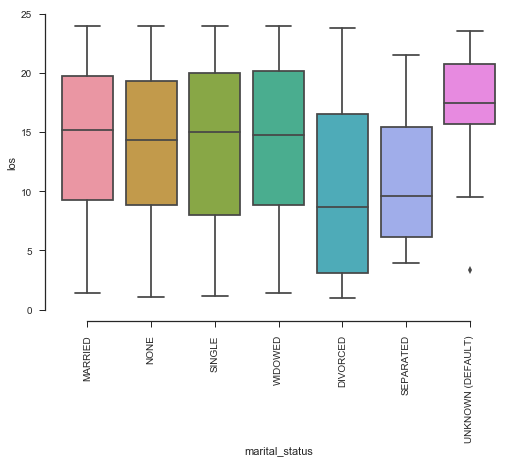

In [209]:
g = sns.boxplot(x="marital_status", y="los", data=onedayadmits)
sns.despine(offset=10, trim=True)
g.set_xticklabels(labels = onedayadmits.marital_status.value_counts().index.tolist(), rotation=90)

In [210]:
onedayadmits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 65 to 49994
Data columns (total 15 columns):
admission_location      1795 non-null object
admission_type          1795 non-null object
admittime               1795 non-null datetime64[ns]
diagnosis               1795 non-null object
discharge_location      1795 non-null object
ethnicity               1795 non-null object
hadm_id                 1795 non-null int64
has_chartevents_data    1795 non-null int64
hospital_expire_flag    1795 non-null int64
insurance               1795 non-null object
language                1795 non-null object
marital_status          1795 non-null object
religion                1795 non-null object
subject_id              1795 non-null int64
los                     1795 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(9)
memory usage: 304.4+ KB


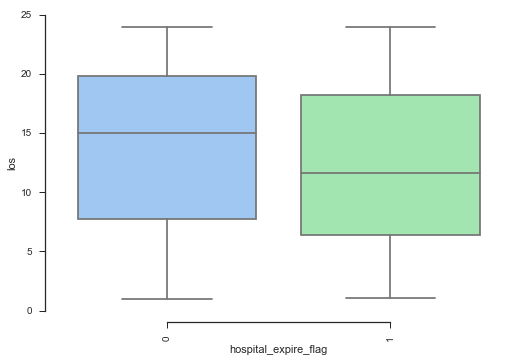

In [213]:
g = sns.boxplot(x="hospital_expire_flag", y="los", data=onedayadmits)
sns.despine(offset=10, trim=True)
g.set_xticklabels(labels = onedayadmits.hospital_expire_flag.value_counts().index.tolist(), rotation=90)

In [239]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
onedayadmits.marital_status = label_encoder.fit_transform(onedayadmits.marital_status)
onedayadmits.admission_location = label_encoder.fit_transform(onedayadmits.admission_location)
onedayadmits.admission_type = label_encoder.fit_transform(onedayadmits.admission_type)
onedayadmits.diagnosis= label_encoder.fit_transform(onedayadmits.diagnosis)
onedayadmits.discharge_location= label_encoder.fit_transform(onedayadmits.discharge_location)
onedayadmits.ethnicity= label_encoder.fit_transform(onedayadmits.ethnicity)
onedayadmits.insurance= label_encoder.fit_transform(onedayadmits.insurance)
onedayadmits.language= label_encoder.fit_transform(onedayadmits.language)
onedayadmits.religion= label_encoder.fit_transform(onedayadmits.religion)
onedayadmits.admittime= label_encoder.fit_transform(onedayadmits.admittime)

In [240]:
train = pd.DataFrame(onedayadmits, columns=['admission_location','admission_type','admittime','diagnosis','discharge_location','ethnicity','hospital_expire_flag','insurance','language','marital_status','religion'])

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(train, onedayadmits['los'], test_size=0.2, random_state=42)


In [251]:
onedayadmits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 65 to 49994
Data columns (total 15 columns):
admission_location      1795 non-null int64
admission_type          1795 non-null int64
admittime               1795 non-null int64
diagnosis               1795 non-null int64
discharge_location      1795 non-null int64
ethnicity               1795 non-null int64
hadm_id                 1795 non-null int64
has_chartevents_data    1795 non-null int64
hospital_expire_flag    1795 non-null int64
insurance               1795 non-null int64
language                1795 non-null int64
marital_status          1795 non-null int64
religion                1795 non-null int64
subject_id              1795 non-null int64
los                     1795 non-null float64
dtypes: float64(1), int64(14)
memory usage: 304.4 KB


In [262]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
print('\n \nScore: \n', regr.score(X_test,y_test))


# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficients: 
 [-5.40478078e-01 -2.17946128e-01 -9.81124081e-04 -2.57867321e-03
 -6.98481185e-01  2.69449786e-02 -5.51817356e+00 -4.74781469e-01
 -2.61651808e-02  9.55616819e-02  4.70954418e-02]

 
Score: 
 0.145682600112074


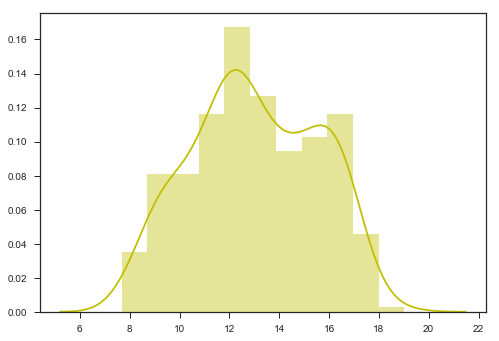

In [272]:
sns.distplot(y_pred,color="y")